In [38]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import pydot
from networkx.drawing.nx_pydot import graphviz_layout

In [2]:
color_dict = {1:'red', 2:'blue', 3:'limegreen', 4:'limegreen'}

In [3]:
df = pd.read_csv('neuron_shape_data/test_neuron.txt', sep = ' ', header=None, skipinitialspace = True)
df.columns = ['comp_id','type','x','y','z','radius','parent_id']
df

,comp_id,type,x,y,z,radius,parent_id
0,1,1,0.00,0.00,0.00,5.165,-1
1,2,1,-2.29,-4.49,1.08,5.165,1
2,3,1,2.29,4.48,-1.08,5.165,1
3,4,2,-3.91,0.70,-2.40,0.120,1
4,5,2,-1.67,-1.67,-3.15,0.120,4
...,...,...,...,...,...,...,...
1190,1191,3,13.96,184.84,26.35,0.240,1190
1191,1192,3,14.93,185.06,27.75,0.240,1191
1192,1193,3,18.04,184.63,29.41,0.240,1192
1193,1194,3,20.26,183.99,31.43,0.240,1193


In [33]:
G = nx.Graph()
for index, row in df.iterrows():
    G.add_node(int(row['comp_id']), nodetype = int(row['type']))
    
for index, row in df.iterrows():
    if index > 0:
        G.add_edge(int(row['comp_id']), int(row['parent_id']))
        
xy_coordinates = list(df[['x', 'y']].itertuples(index=False, name=None))
xy_coordinates = {row[0]: tuple(row[1:])[0] for row in zip(df['comp_id'], xy_coordinates)}

node_colors = [color_dict[t] for t in df['type']]

node_radius = np.array([row['radius'] for index, row in df.iterrows()])
node_radius = node_radius*(5/np.min(node_radius))

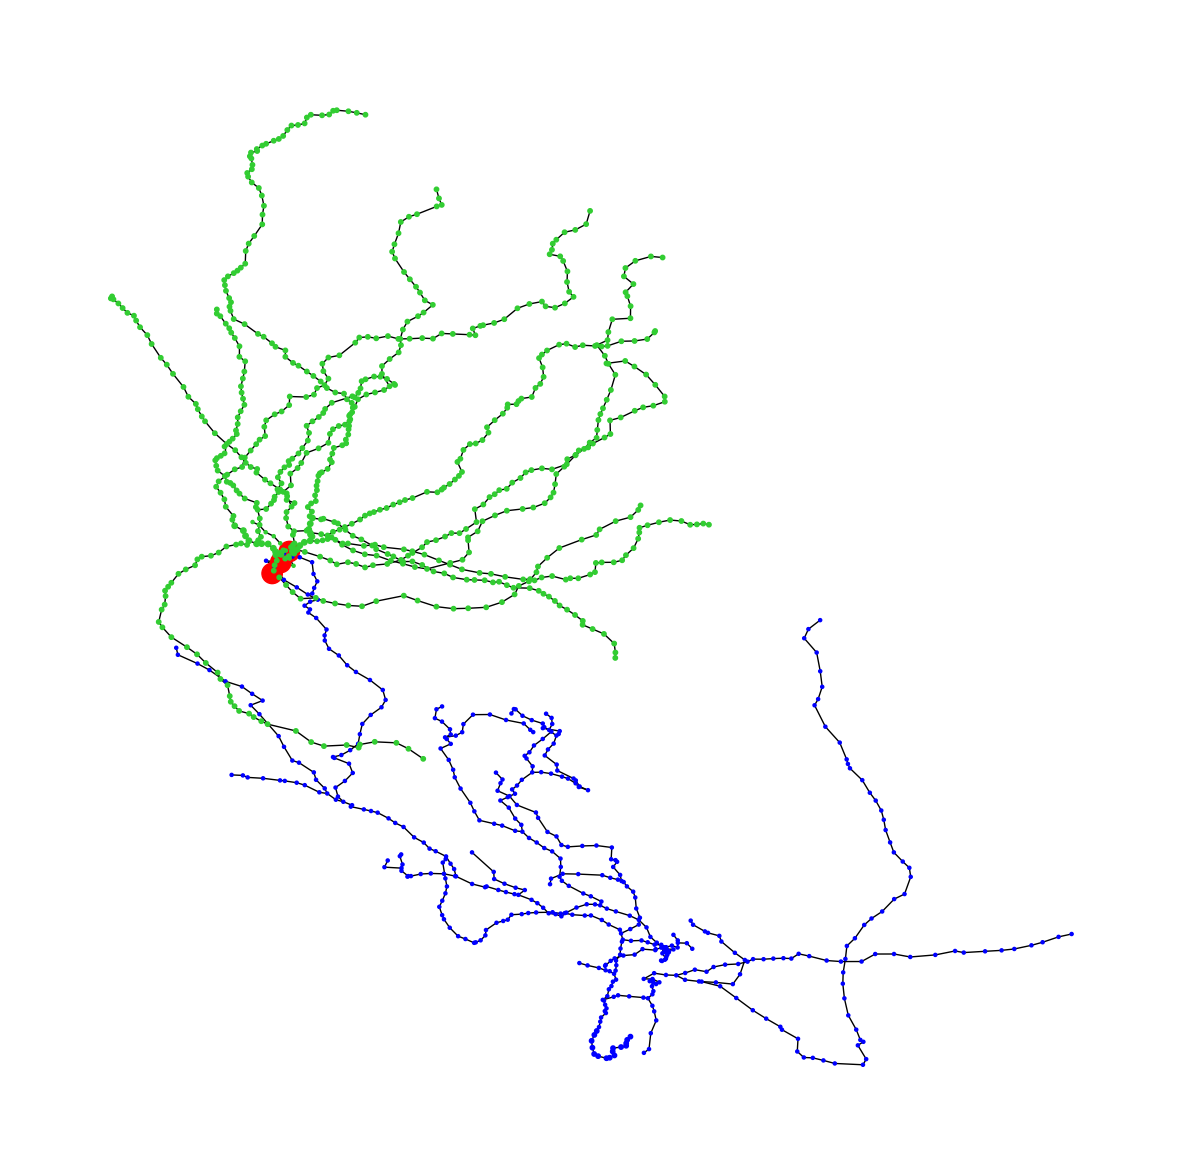

In [34]:
fig, ax = plt.subplots(figsize=(15, 15))
nx.draw(G, pos=xy_coordinates, node_size=node_radius, ax=ax, node_color = node_colors)
plt.show()

[3, 139, 150, 177, 231, 261, 266, 296, 303, 336, 341, 343, 356, 399, 405, 416, 436, 445, 451, 462, 465, 476, 493, 501, 509, 566, 604, 664, 702, 751, 801, 872, 912, 951, 1001, 1059, 1103, 1195]
[1, 8, 39, 55, 62, 73, 91, 96, 102, 109, 115, 144, 163, 166, 267, 276, 339, 369, 379, 396, 430, 459, 467, 512, 514, 567, 607, 668, 755, 757, 878, 956, 959, 1064]
[]


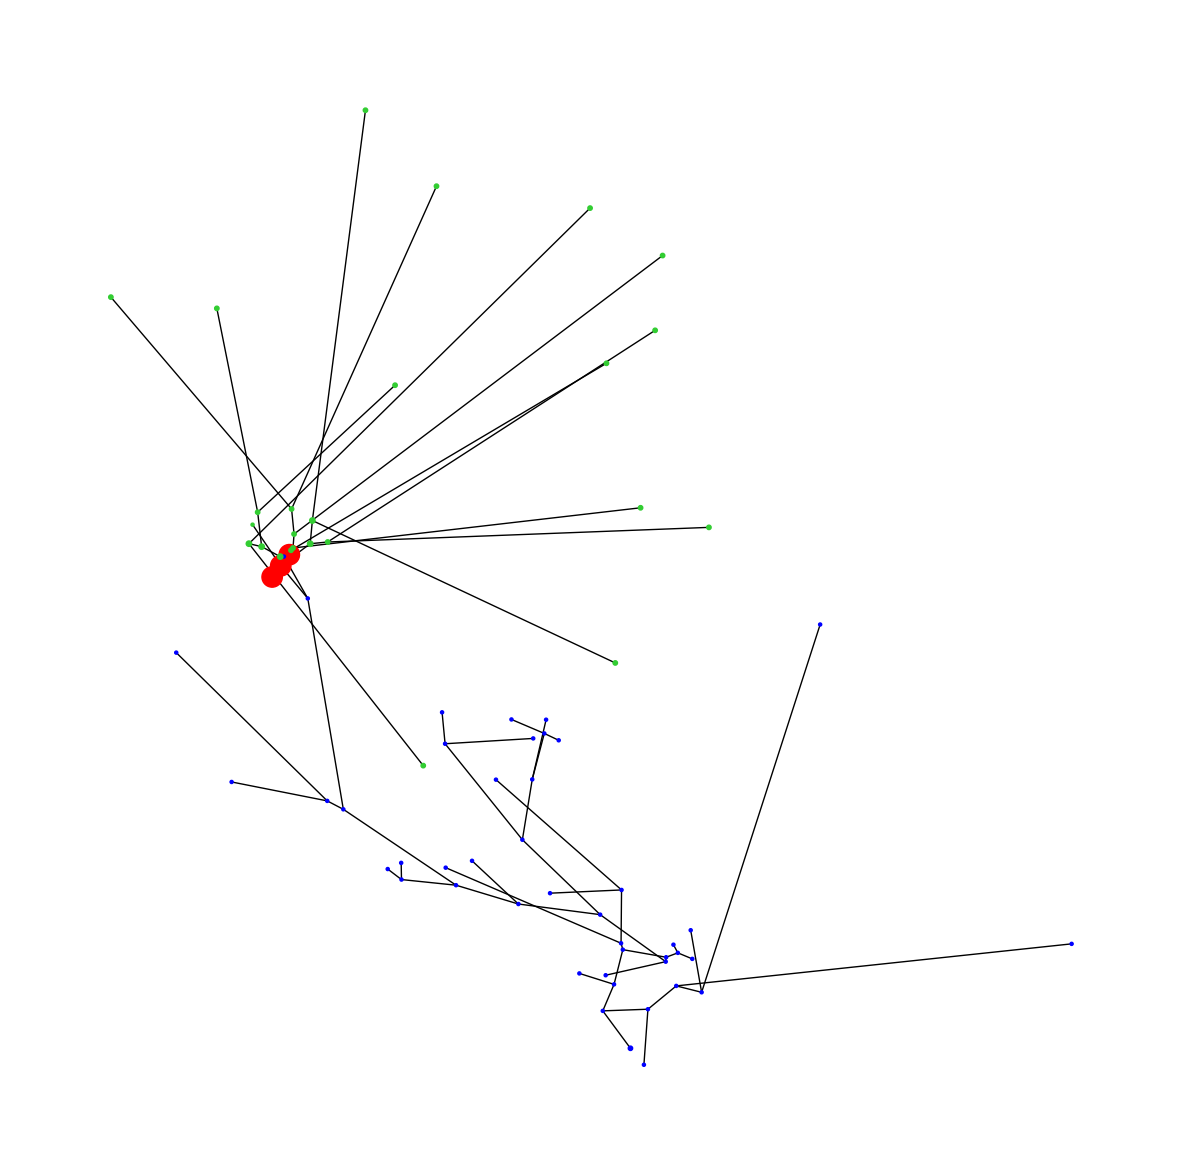

In [37]:
leaf_nodes = [x for x in G.nodes() if G.degree(x)==1]
root_node = [leaf_nodes[0]]; leaf_nodes = leaf_nodes[1:]
print(leaf_nodes)
branch_nodes = [x for x in G.nodes() if len(nx.descendants_at_distance(G, x, 1)) > 2]
print(branch_nodes)

transition_nodes = []
transition_node_index = []
for i, node in enumerate(G.nodes()):
    if (node not in leaf_nodes) and (node not in root_node) and (node not in branch_nodes):
        transition_nodes.append(node)
        transition_node_index.append(i)

print(transition_nodes)
for i in range(len(transition_nodes)):
    node = transition_nodes[i]
    bef, aft = nx.descendants_at_distance(G, node, 1)
    G.remove_node(node)
    G.add_edge(bef, aft)
    




/tmp/ipykernel_8495/590215207.py:1: DeprecationWarning: nx.nx_pydot.graphviz_layout depends on the pydot package, which hasknown issues and is not actively maintained. Consider usingnx.nx_agraph.graphviz_layout instead.

See https://github.com/networkx/networkx/issues/5723
  pos = graphviz_layout(G, prog="dot")


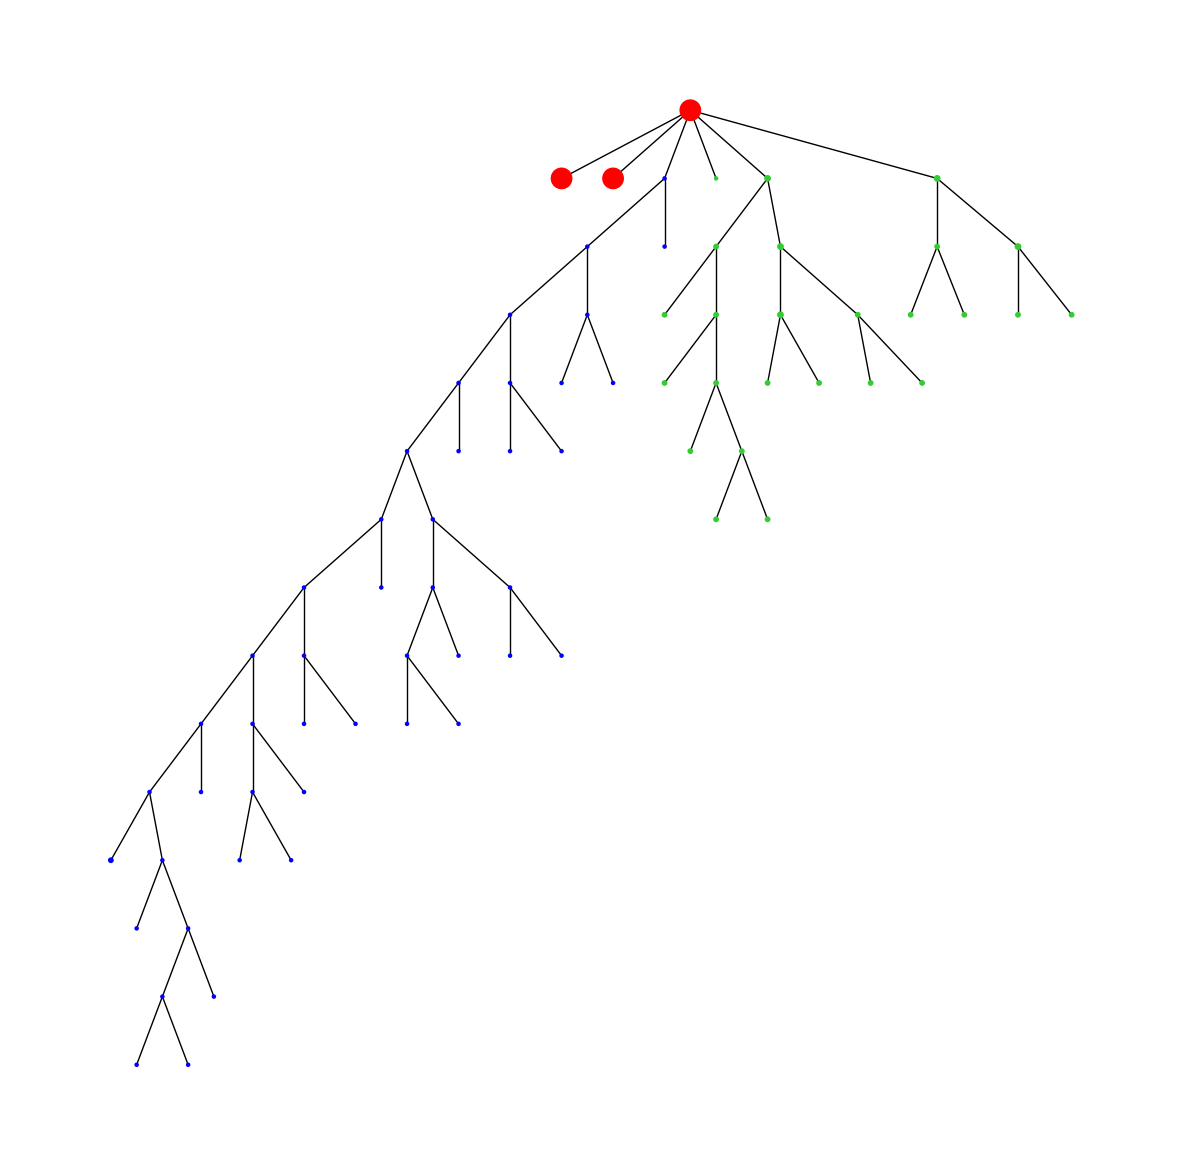

In [40]:
pos = graphviz_layout(G, prog="dot")

xy_coordinates = {element:xy_coordinates[element] for element in xy_coordinates if element not in transition_nodes}
node_colors = [element for i, element in enumerate(node_colors) if i not in transition_node_index]
node_radius = [element for i, element in enumerate(node_radius) if i not in transition_node_index]

fig, ax = plt.subplots(figsize=(15, 15))
nx.draw(G, pos=pos, node_size=node_radius, ax=ax, node_color = node_colors)
plt.show()